# Mathematics Form & Function: Chapter 9 - Mechanics

## 1. Kepler's Laws

The laws:

1. The planets describe orbits in a plane containing the sun, in such a way that areas swept out in equal times are equal.
2. Each planetary orbit is an ellipse with the sun at one focus.
3. The square of the period of each planet in its orbit is proportional to the length of the major axis of the ellipse.

In [1]:
import numpy as np

def force(mass, acceleration):
    """ Newton's 2nd law. """
    return mass * acceleration

print(force(2, np.array([2, 3, 4])))
print(force(5, np.array([2, 3, 4])))
print(force(10, np.array([2, 3, 4])))

[4 6 8]
[10 15 20]
[20 30 40]


In [2]:
def inverse_square_law(m1, m2, r):
    """
    The inverse square law returns the magnitude of a gravitational force.
    
    m1 = a mass
    m2 = another mass
    r  = the distance in a straight line between masses.
    """
    constant = 1 # the gravitational constant
    return constant * ((m1 * m2) / r**2)

print(inverse_square_law(2, 3, 2))
print(inverse_square_law(2, 3, 4))
print(inverse_square_law(2, 3, 6))
print(inverse_square_law(3, 3, 6))
print(inverse_square_law(3, 4, 6))

1.5
0.375
0.16666666666666666
0.25
0.3333333333333333


In [3]:
import math

def newtons_2nd_law_plane(F, theta):
    """
    Newton's 2nd law taking polar coordinates.
    
    F - a magnitude of force
    theta - the angle from y == 0
    """
    mx = -F * math.cos(theta)
    my = -F * math.sin(theta)
    return [mx, my]

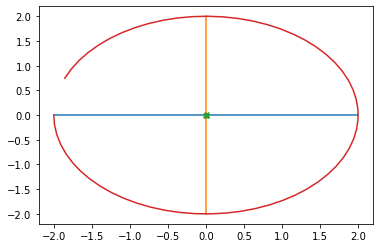

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

coords = []
for i in np.arange(0, 6, .1):
    coords.append(newtons_2nd_law_plane(2, i))

df = pd.DataFrame(columns = ['x', 'y'], data = np.array(coords))

plt.plot([-2, 2], [0, 0])
plt.plot([0, 0], [-2, 2])
plt.plot(0, 0, 'X')
plt.plot(df['x'], df['y'])
plt.show()

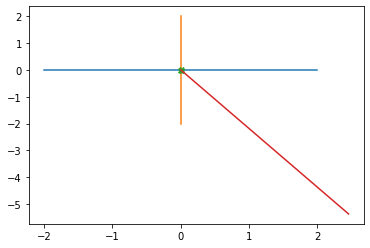

In [5]:
coords = []
for i in np.arange(0, 6, .1):
    coords.append(newtons_2nd_law_plane(i, 2))

df = pd.DataFrame(columns = ['x', 'y'], data = np.array(coords))

plt.plot([-2, 2], [0, 0])
plt.plot([0, 0], [-2, 2])
plt.plot(0, 0, 'X')
plt.plot(df['x'], df['y'])
plt.show()

In [6]:
F = 10
theta = 3
r = 5
mx = -F * math.cos(theta)
my = -F * math.sin(theta)

x = r * math.cos(theta)
y = r * math.sin(theta)

# The following states that the time derivate of the 1st deritive of y * x,
# minus the 1st derivative of x * y is equal to zero
(mx * y) - (my * x) == 0

True

In [7]:
def angular_momentum_polar(m, r, theta):
    """
    The angular momemuntum in polar coordinates.
    
    m = mass
    r = distance from the zero point
    theta = angular velocity about 0
    """
    return m * r**2 * theta

# Increasing the angle
print(angular_momentum_polar(2, 2, 1))
print(angular_momentum_polar(2, 2, 2))
print(angular_momentum_polar(2, 2, 3))

8
16
24


In [8]:
# Increasing the mass
print(angular_momentum_polar(1, 2, 2))
print(angular_momentum_polar(2, 2, 2))
print(angular_momentum_polar(3, 2, 2))

8
16
24


In [9]:
# Increasing the distance
print(angular_momentum_polar(2, 1, 2))
print(angular_momentum_polar(2, 2, 2))
print(angular_momentum_polar(2, 3, 2))

4
16
36


In [10]:
def area_swept_by_radius(r, theta):
    """ Defines the area that is swept by a radius vector.
    
    r - distance from 0 point to object
    theta - the change in angle
    """
    return .5 * r**2 * theta

print(area_swept_by_radius(5, 1))
print(area_swept_by_radius(5, 3))
print(area_swept_by_radius(5, 6))

12.5
37.5
75.0


In [11]:
def equation_orbit_polar(k, mu, x, y, A, B):
    """
    The equation of an orbit in polar terms:
    
    k - constant of angular momentum
    mu - constant
    x - coordinate
    y - coordinate
    A - constant of integration
    B - constant of integration
    """
    return k**2 / (mu - (x * B) - (y * A))

> When velocity and acceleration are represented by derivatives, as defined in the Calculus, then Kepler's laws, summarizing the obvserations of the positions of the planets, can be deduced from Newton's second law of motion and the inverse square law of gravitation.

---

## 2. Momentum, Work, and Energy

In [12]:
def linear_momentum_3d(mass, vector):
    """ Returns the momentum in 3 dimensions given mass & vector velocity.
    
    mass -- the mass of an object
    vector -- a tuple of 3d coordinates
    """
    x1, x2, x3 = vector
    return (mass * x1, mass * x2, mass * x3)

print(linear_momentum_3d(5, (2, 3, 2)))

(10, 15, 10)


In [13]:
def work_3d(force, displacement):
    """ Defines the work by inner product of force & displacement.
    
    force -- a 3d vector
    displacement -- a 3d vector
    """
    work = 0
    for i in range(0, 3):
        work += force[i] * displacement[i]
    return work

print(work_3d([2, 3, 2], [0, 2, 2]))

10


In [14]:
def kinetic_energy_3d(mass, vector):
    """ Defines the kinetic energy of a particle in 3d.
    
    mass -- a scalar
    vector -- 3d coordinates as a tuple
    """
    x1, x2, x3 = vector
    return .5 * mass * (x1**2 + x2**2 + x3**2)
    
print(kinetic_energy_3d(5, (2, 3, 2)))

42.5


In [17]:
def magnitude_vector_3d(vector):
    """ Return the magnitude. """
    x1, x2, x3 = vector
    return math.sqrt(x1**2 + x2**2 + x3**2)

print(magnitude_vector_3d((2, 3, 3)))

4.69041575982343


In [20]:
# Checking a simplified definition of the kinetic energy:
# (1/2) * mass * magnitude of the vector squared

print(.5 * 5 * magnitude_vector_3d((2, 3, 2))**2)

42.5


In [22]:
def potential_energy(lamb, mass, radius):
    """ Defines the potential energy of a particle at a distance from another.
    
    lamb -- the constant of gravity
    mass -- the mass of the attracting particle
    radius -- the distance between the particles
    """
    return (-lamb) * (mass / radius)

print(potential_energy(1, 2, 5))

-0.4


In [24]:
def potential(lamb, radius):
    """ Defines the potential.
    
    lamb -- the constant of gravity
    radius -- the distance between particles
    """
    return (-lamb) / radius

print(potential(1, 5))

-0.2


---

## 3. Lagrange's Equations